Código que lê todos os arquivos .csv de nanocubo e quantum dot contendo os valores das energias obtidas pelo Mathematica e faz um gráfico da energia de cada arquivo em função do tamanho do material.
É feita uma interpolação a partir dos dados lidos, para obter um valor melhor da energia.

In [1]:
import numpy as np
from numpy import pi
import pylab as plt
import csv
import glob
from scipy.interpolate import interp1d

In [29]:
# caminho da pasta que contém os arquivos que serão lidos
files = glob.glob("C:/Users/Gabriel/Desktop/Google Drive/IC Lazaro/simulacoes/mathematica/nanocubo/*.csv")

tamanhos = [] # tamanhos dos materiais lidos
# lê o tamanho do material a partir do nome do arquivo
for fileName in files:
    aux = 0
    nome = ""
    for i in range(len(fileName)):
        if fileName[i] == '.' and fileName[i + 1] == 'c':
            break
        if aux == 1:
            nome += fileName[i]
        if fileName[i] == '_':
            aux = 1
    
    tamanhos.append(float(nome))

tamanhos.sort()
# nomes dos arquivos que serão lidos, agora ordenados
nomes = ["nanocubo_" + str(i) + ".csv" for i in tamanhos]

Es = [] # energias de ligacao para cada tamanho
for nome in nomes:
    E_input = [] # valores da energia lidos do arquivo nome
    with open("C:/Users/Gabriel/Desktop/Google Drive/IC Lazaro/simulacoes/mathematica/nanocubo/" + nome) as file:
        data = list(csv.reader(file))
        
        # leitura dos parâmetros
        a = float(data[0][0])
        lambIni = float(data[0][1])
        lambFin = float(data[0][2])
        lambN = int(data[0][3])
        
        # leitura das energias
        for elem in data[1:]:
            E_input.append(float(elem[0]))
        
        lambs = np.linspace(lambIni, lambFin, lambN) # range em lambda de nome
        interp = interp1d(lambs, E_input, kind='cubic') # interpolação cúbica
        lambs = np.linspace(lambIni, lambFin, 1000) # novo range em lambda
        
        Es_aux = interp(lambs) # valores de energia para o novo range
        energia = np.amin(Es_aux) # energia de ligação de nome
        
        Es.append(energia)
        
Es_NC = Es
tamanhos_NC = tamanhos

In [30]:
# caminho da pasta que contém os arquivos que serão lidos
files = glob.glob("C:/Users/Gabriel/Desktop/Google Drive/IC Lazaro/simulacoes/mathematica/quantum dot/*.csv")

tamanhos = [] # tamanhos dos materiais lidos
# lê o tamanho do material a partir do nome do arquivo
for fileName in files:
    aux = 0
    nome = ""
    for i in range(len(fileName)):
        if fileName[i] == '.' and fileName[i + 1] == 'c':
            break
        if aux == 1:
            nome += fileName[i]
        if fileName[i] == '_' and fileName[i - 1] == 't':
            aux = 1
    
    tamanhos.append(float(nome))

tamanhos.sort()
# nomes dos arquivos que serão lidos, agora ordenados
nomes = ["quantum_dot_" + str(i) + ".csv" for i in tamanhos]

Es = [] # energias de ligacao para cada tamanho
for nome in nomes:
    E_input = [] # valores da energia lidos do arquivo nome
    with open(nome) as file:
        data = list(csv.reader(file))
        
        # leitura dos parâmetros
        a = float(data[0][0])
        lambIni = float(data[0][1])
        lambFin = float(data[0][2])
        lambN = int(data[0][3])
        
        # leitura das energias
        for elem in data[1:]:
            E_input.append(float(elem[0]))
        
        lambs = np.linspace(lambIni, lambFin, lambN) # range em lambda de nome
        interp = interp1d(lambs, E_input, kind='cubic') # interpolação cúbica
        lambs = np.linspace(lambIni, lambFin, 1000) # novo range em lambda
        
        Es_aux = interp(lambs) # valores de energia para o novo range
        energia = np.amin(Es_aux) # energia de ligação de nome
        
        Es.append(energia)
        
Es_QD = Es
tamanhos_QD = tamanhos

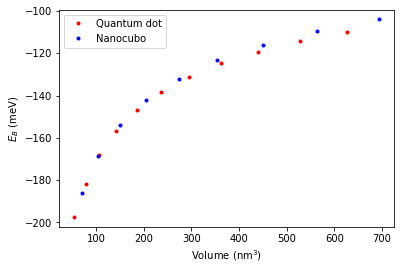

In [34]:
plt.plot([4/3*pi*(tamanhos_QD[i]/2)**3 for i in range(2, len(tamanhos_QD))],
         [Es_QD[i] for i in range(2, len(tamanhos_QD))], 'r.', label='Quantum dot')
plt.plot([tamanhos_NC[i]**3 for i in range(0, len(tamanhos_NC) - 10)],
         [Es_NC[i] for i in range(0, len(tamanhos_NC) - 10)], 'b.', label='Nanocubo')
plt.ylabel(r'$E_B$' + ' (meV)')
plt.xlabel(r'Volume (nm$^3$)')
plt.legend()
plt.savefig('quantum_dot_x_nanocubo.svg')
plt.show()